In [1]:
import requests
import pandas as pd
import numpy as np
import findspark
import pandas as pd
import numpy as np
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.functions import*
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType
from pyspark import SparkContext
from pyspark.sql.functions import monotonically_increasing_id
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
spark = SparkSession.builder.appName("Rate_Transactions").getOrCreate()

In [3]:
query= "(WITH total_transactions AS \
             (SELECT SUM(transaction_value) AS 'sum_total' \
              FROM cdw_sapp_credit_card), sum_trans_value AS \
            (SELECT transaction_type, SUM(transaction_value) AS 'SUM1' \
             FROM cdw_sapp_credit_card GROUP BY transaction_type) \
             SELECT sum_trans_value.transaction_type,  \
             ROUND((sum_trans_value.SUM1 *100/ total_transactions.sum_total),2) AS Rate \
             FROM total_transactions \
             INNER JOIN sum_trans_value) as trans_value"

sdf_rate = spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="password",\
                                     url="jdbc:mysql://localhost:3306/capstone_project",\
                                     dbtable=query).load()

sdf_rate.show()

+----------------+-----+
|transaction_type| Rate|
+----------------+-----+
|           Bills|14.74|
|       Education|14.18|
|   Entertainment|14.22|
|             Gas| 14.1|
|         Grocery|14.14|
|      Healthcare|14.29|
|            Test|14.32|
+----------------+-----+



In [4]:
df_rate = sdf_rate.toPandas()
df_rate.set_index('transaction_type', inplace = True)
#pdtrans_rate

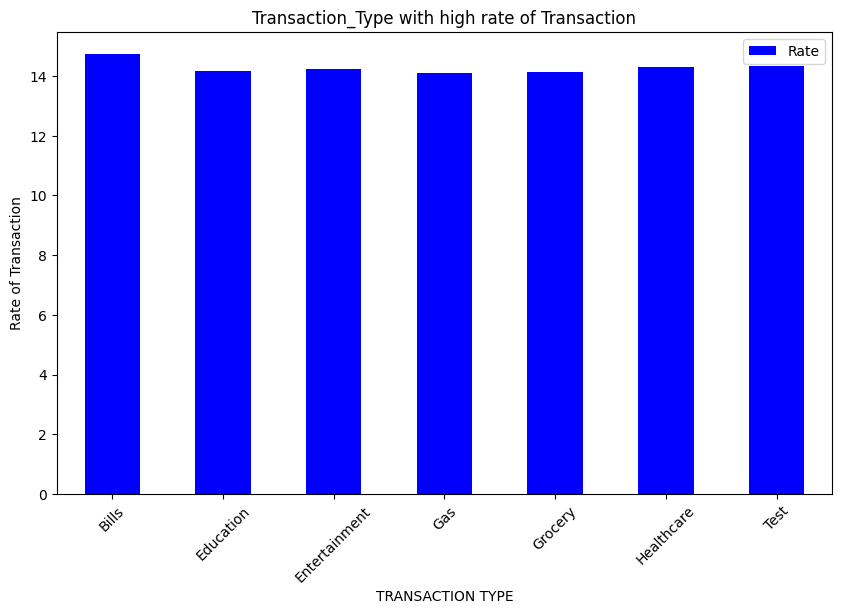

In [5]:
df_rate.plot(kind='bar', figsize=(10, 6), color = 'blue')
xlabel = plt.xlabel('TRANSACTION TYPE')
#plt.xlabel('Branch_code with Health_care transaction')
xlabel.set_position((0.5, 0.1))
plt.ylabel('Rate of Transaction')
plt.title('Transaction_Type with high rate of Transaction')
plt.xticks(rotation=45)
plt.show()
spark.stop()
    